In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras import regularizers

Using TensorFlow backend.


In [2]:
df = pd.read_csv('housepricedata.csv')
df.head(10)

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450.0,7.0,5.0,856.0,2.0,1.0,3.0,8.0,0.0,548.0,1.0
1,9600.0,6.0,8.0,1262.0,2.0,0.0,3.0,6.0,1.0,460.0,1.0
2,11250.0,7.0,5.0,920.0,2.0,1.0,3.0,6.0,1.0,608.0,1.0
3,9550.0,7.0,5.0,756.0,1.0,0.0,3.0,7.0,1.0,642.0,0.0
4,14260.0,8.0,5.0,1145.0,2.0,1.0,4.0,9.0,1.0,836.0,1.0
5,14115.0,5.0,5.0,796.0,1.0,1.0,1.0,5.0,0.0,480.0,0.0
6,10084.0,8.0,5.0,1686.0,2.0,0.0,3.0,7.0,1.0,636.0,1.0
7,10382.0,7.0,6.0,1107.0,2.0,1.0,3.0,7.0,2.0,484.0,1.0
8,6120.0,7.0,5.0,952.0,2.0,0.0,2.0,8.0,2.0,468.0,0.0
9,7420.0,5.0,6.0,991.0,1.0,0.0,2.0,5.0,2.0,205.0,0.0


In [3]:
df.isnull().any()
df = df.fillna(method='ffill')

In [4]:
df.isnull().any()

LotArea             False
OverallQual         False
OverallCond         False
TotalBsmtSF         False
FullBath            False
HalfBath            False
BedroomAbvGr        False
TotRmsAbvGrd        False
Fireplaces          False
GarageArea          False
AboveMedianPrice    False
dtype: bool

In [5]:
dataset=df.values

In [12]:
X=dataset[:,0:10]
Y=dataset[:,10]

In [13]:
min_max_scaler=preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X) #fit compute the mean and std,transform uses a previously computed mean and std to auto scale the data, Sub mean from all values and then devide it by std, fit transform does both at the same time

In [14]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [15]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1023, 10) (219, 10) (220, 10) (1023,) (219,) (220,)


## We specify that in our Keras sequential model like this:

In [16]:
#Sigmoid Function (A function which ‘squeezes’ all the initial output to be between 0 and 1)
#ReLU Function (If the initial output is negative, then output 0. If not, do nothing to the initial output)
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [17]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1023 samples, validate on 219 samples
Epoch 1/100
1023/1023 [==============================] - 0s 78us/step - loss: 0.2893 - acc: 0.8817 - val_loss: 0.2636 - val_acc: 0.8858
Epoch 2/100
1023/1023 [==============================] - 0s 108us/step - loss: 0.2879 - acc: 0.8807 - val_loss: 0.2639 - val_acc: 0.8950
Epoch 3/100
1023/1023 [==============================] - 0s 85us/step - loss: 0.2878 - acc: 0.8827 - val_loss: 0.2642 - val_acc: 0.8950
Epoch 4/100
1023/1023 [==============================] - 0s 82us/step - loss: 0.2868 - acc: 0.8798 - val_loss: 0.2633 - val_acc: 0.8950
Epoch 5/100
1023/1023 [==============================] - 0s 98us/step - loss: 0.2863 - acc: 0.8788 - val_loss: 0.2644 - val_acc: 0.8950
Epoch 6/100
1023/1023 [==============================] - 0s 62us/step - loss: 0.2855 - acc: 0.8798 - val_loss: 0.2617 - val_acc: 0.8950
Epoch 7/100
1023/1023 [==============================] - 0s 67us/step - loss: 0.2853 - acc: 0.8807 - val_loss: 0.2624 - val_acc: 0.8950


In [20]:
print(hist.history['val_loss'])

[0.26364392811032733, 0.2639441047221014, 0.26415979481178875, 0.2633288541477021, 0.2643697482946257, 0.2616759121554083, 0.2623619602559364, 0.2611599732615632, 0.26179262771181866, 0.2613558612729861, 0.26105534717372564, 0.25980933963163805, 0.25915019949005075, 0.25782409739004425, 0.2606355071612145, 0.2606922312550349, 0.25803218659472793, 0.25929652215683296, 0.25667464168376575, 0.2568335518172887, 0.25600836143646066, 0.2562364465025462, 0.25478454526156596, 0.2547501565794967, 0.25581831740189903, 0.25478666415225426, 0.2558549047877255, 0.25418392456557654, 0.25495877950431006, 0.25747372312088534, 0.25435936274049487, 0.25331557858480164, 0.25665757386651755, 0.2531058601864941, 0.2519345220229397, 0.25297784417459407, 0.2534153491394705, 0.2517049219374243, 0.2512381829355405, 0.2504395451311651, 0.2518966364670018, 0.25103511365309156, 0.2504729598624521, 0.2554843712206845, 0.2507206070913027, 0.2495375960793125, 0.251375918927258, 0.25379332587054876, 0.251252789067351

In [21]:
model.evaluate(X_test, Y_test)[1]

220/220 [==============================] - 0s 40us/step


0.8999999989162791

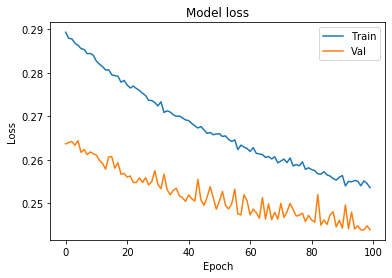

In [22]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

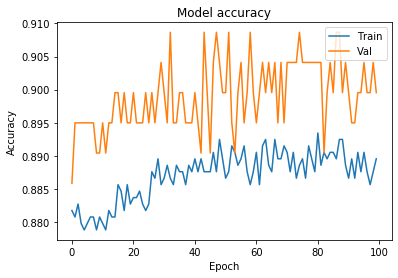

In [23]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [24]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [25]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

In [150]:
model_3.evaluate(X_test, Y_test)[1]

220/220 [==============================] - 0s 638us/step


0.9136363625526428

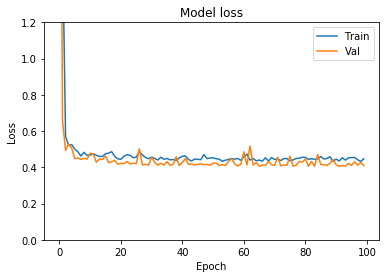

In [151]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

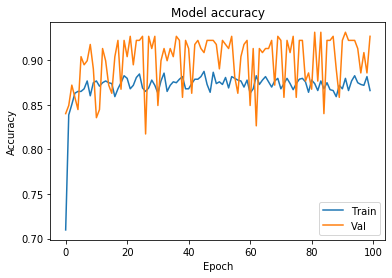

In [152]:
plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## Prediction On Test data

In [153]:
y_pred=model_3.predict(X_test)
print(y_pred)

[[0.06686842]
 [0.05819431]
 [0.9372022 ]
 [0.08862868]
 [0.9666686 ]
 [0.04573306]
 [0.97303104]
 [0.88409966]
 [0.23505747]
 [0.94545436]
 [0.8527925 ]
 [0.73185444]
 [0.830292  ]
 [0.35862574]
 [0.04435244]
 [0.5986772 ]
 [0.05505463]
 [0.9873494 ]
 [0.7527067 ]
 [0.04388407]
 [0.8379559 ]
 [0.0473724 ]
 [0.9504214 ]
 [0.06108931]
 [0.67199814]
 [0.92245317]
 [0.08307159]
 [0.04456574]
 [0.63686913]
 [0.95457125]
 [0.41704434]
 [0.7529384 ]
 [0.10109174]
 [0.8961543 ]
 [0.80315495]
 [0.5445405 ]
 [0.21856347]
 [0.8665352 ]
 [0.7939311 ]
 [0.8715248 ]
 [0.09503925]
 [0.29583088]
 [0.9771501 ]
 [0.69356424]
 [0.10366279]
 [0.39143994]
 [0.14180985]
 [0.7999505 ]
 [0.9544934 ]
 [0.08483905]
 [0.04462412]
 [0.0828445 ]
 [0.98510617]
 [0.67295086]
 [0.07617444]
 [0.9126427 ]
 [0.8876297 ]
 [0.8115691 ]
 [0.5574511 ]
 [0.06961203]
 [0.49863964]
 [0.1919491 ]
 [0.8510662 ]
 [0.71542406]
 [0.17336467]
 [0.3574534 ]
 [0.98398256]
 [0.9821627 ]
 [0.04388186]
 [0.07544604]
 [0.7222698 ]
 [0.93

In [154]:
rounded=[round(x[0]) for x in y_pred]
rounded

[0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0

In [155]:
df1 = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': rounded})
df1.head()

,Actual,Predicted
0,0.0,0.0
1,0.0,0.0
2,1.0,1.0
3,0.0,0.0
4,1.0,1.0


## MY Own Prediction / My Own Data

In [218]:
df2 = pd.read_csv('housepricedata(test).csv')
df2.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea
0,8450,7,5,856,2,1,3,8,0,548
1,14115,5,5,796,1,1,1,5,0,480
2,7555,6,4,881,1,1,2,6,0,360
3,8455,8,6,888,2,1,3,8,0,600


In [219]:
x1=df2.values
x1

array([[ 8450,     7,     5,   856,     2,     1,     3,     8,     0,
          548],
       [14115,     5,     5,   796,     1,     1,     1,     5,     0,
          480],
       [ 7555,     6,     4,   881,     1,     1,     2,     6,     0,
          360],
       [ 8455,     8,     6,   888,     2,     1,     3,     8,     0,
          600]], dtype=int64)

In [220]:
min_max_scaler_2=preprocessing.MinMaxScaler()
X_scale_new = min_max_scaler_2.fit_transform(x1)

In [221]:
X_scale_new

array([[0.13643293, 0.66666667, 0.5       , 0.65217391, 1.        ,
        0.        , 1.        , 1.        , 0.        , 0.78333333],
       [1.        , 0.        , 0.5       , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5       ],
       [0.        , 0.33333333, 0.        , 0.92391304, 0.        ,
        0.        , 0.5       , 0.33333333, 0.        , 0.        ],
       [0.13719512, 1.        , 1.        , 1.        , 1.        ,
        0.        , 1.        , 1.        , 0.        , 1.        ]])

In [222]:
y_pred_new=model_3.predict(X_scale_new)
print(y_pred_new)

[[0.9859113 ]
 [0.04394859]
 [0.04870012]
 [0.99690557]]


In [223]:
rounded=[round(x[0]) for x in y_pred_new]
rounded

[1.0, 0.0, 0.0, 1.0]